In [1]:
import numpy as np
import pandas as pd
from openbb import obb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

obb.user.preferences.output_type = 'dataframe'
symbols = ['NEM', 'RGLD','SSRM', 'CDE','LLY', 'UNH','JNJ', 'MRK']

data = obb.equity.price.historical(symbols, start_date='2020-01-01',end_date='2023-01-01', provider='yfinance').pivot(columns='symbol', values='close')
returns = data.pct_change().dropna()

pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [3]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_
pca_components

array([[ 0.78402106,  0.06139341,  0.06157203,  0.06678106,  0.29181296,
         0.30862968,  0.42713718,  0.10216529],
       [ 0.03070356,  0.34058264,  0.60677508,  0.39052223, -0.09200527,
        -0.12445024, -0.22896855,  0.53478754],
       [ 0.6180319 , -0.10864359, -0.13197692, -0.07204876, -0.39555206,
        -0.41760383, -0.48391774, -0.13635775]])

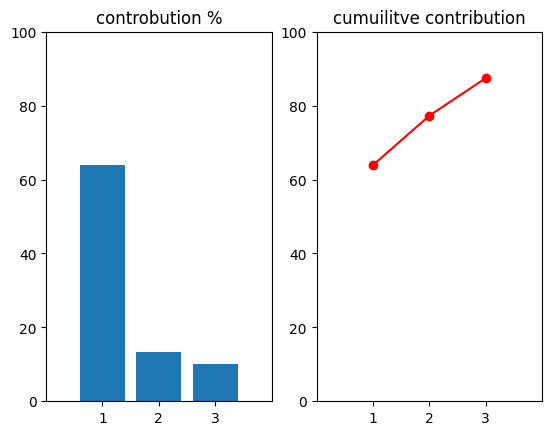

In [4]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)
plt.subplot(1,2,1)
plt.bar(x,pct*100, align='center')
plt.title('controbution %')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.subplot(1,2,2)
plt.plot(x,cum_pct*100, 'ro-')
plt.title('cumuilitve contribution')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.show()

In [5]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns= ['f1','f2','f3'],
    index = returns.index,
    data=factor_returns
)
factor_returns

,f1,f2,f3
date,,,
2020-01-03,-0.028854,-0.007880,0.013453
2020-01-06,-0.081176,0.006441,-0.058876
2020-01-07,0.003671,-0.015563,-0.013919
2020-01-08,-0.105889,0.028154,-0.005643
2020-01-09,0.001916,0.018522,0.023465
...,...,...,...
2022-12-23,0.001576,0.007398,-0.020952
2022-12-27,0.079420,-0.010218,0.022537
2022-12-28,-0.081093,0.004814,0.005850


In [13]:
factor_exposure = pd.DataFrame(
    index= ['f1','f2','f3'],
    columns = returns.columns,
    data=pca_components
)

factor_exposure

symbol,CDE,JNJ,LLY,MRK,NEM,RGLD,SSRM,UNH
f1,0.784021,0.061393,0.061572,0.066781,0.291813,0.308630,0.427137,0.102165
f2,0.030704,0.340583,0.606775,0.390522,-0.092005,-0.124450,-0.228969,0.534788
f3,0.618032,-0.108644,-0.131977,-0.072049,-0.395552,-0.417604,-0.483918,-0.136358


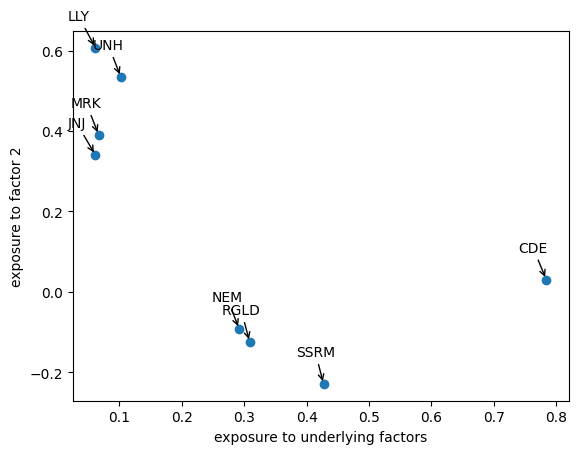

In [15]:
factor_exposure = factor_exposure.T
labels = factor_exposure.index
data= factor_exposure.values
plt.scatter(data[:,0], data[:,1])
plt.xlabel('exposure to underlying factors')
plt.ylabel('exposure to factor 2')
for label,x,y in zip(labels, data[:,0],data[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-20,20), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),)
plt.show()